### 초기설정

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd

df_2018 = pd.read_excel('/content/2018.xlsx')
df_2019 = pd.read_excel('/content/2019.xlsx')
df_2020 = pd.read_excel('/content/2020.xlsx')
df_2021 = pd.read_excel('/content/2021.xlsx')
df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [3]:
grade_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통이다': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [4]:
df_2018['국가명'] = df_2018['COUNTRY']

In [5]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2022~2024

In [6]:
# 1. 활동명 매핑
q4a_mapping_2022 = {
    "Q4A01": "식도락 관광", "Q4A02": "쇼핑", "Q4A03": "자연경관 감상", "Q4A04": "고궁/역사 유적지 방문",
    "Q4A05": "전통문화체험", "Q4A06": "박물관, 전시관 관람", "Q4A07": "K-POP/한류스타 공연장 방문",
    "Q4A08": "드라마/영화 촬영지 방문", "Q4A09": "연극, 뮤지컬, 발레 등 공연 관람", "Q4A10": "지역 축제 참여",
    "Q4A11": "유흥/오락", "Q4A12": "뷰티/의료관광", "Q4A13": "스포츠/레포츠 및 비즈니스 활동",
    "Q4A14": "업무수행", "Q4A15": "연수/교육/연구", "Q4A16": "시찰(산업시설 등)", "Q4A17": "기타"
}

q4b_code_mapping_2022 = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관, 전시관 관람", 7: "K-POP/한류스타 공연장 방문",
    8: "드라마/영화 촬영지 방문", 9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥/오락", 12: "뷰티/의료관광", 13: "스포츠/레포츠 및 비즈니스 활동",
    14: "업무수행", 15: "연수/교육/연구", 16: "시찰(산업시설 등)", 17: "기타"
}

q4a_cols = list(q4a_mapping_2022.keys())
q4b_cols = ["Q4B1", "Q4B2", "Q4B3"]

# 2. 주요활동 추출 함수
def get_q4a_activities(row):
    return [q4a_mapping_2022[col] for col in q4a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q4b_satisfaction(row):
    return [q4b_code_mapping_2022.get(int(row[col]), f"코드 {row[col]}")
            for col in q4b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2022가 정의된 상태에서만)
df_2022["주요활동"] = df_2022.apply(get_q4a_activities, axis=1)
df_2022["만족활동"] = df_2022.apply(get_q4b_satisfaction, axis=1)


In [7]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [8]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


# 1차 클러스터링

**활동을 넣는게 좋을까??**

만족 활동은 세부 세그먼트로 사용해야 해석이 명확
‘무엇에 만족했는가’는 전략 방향 결정의 보조 지표

만약 이걸 처음부터 클러스터링에 넣으면,

활동 취향만 비슷한데 실제 회복률은 낮은 국가들이 섞일 수 있음.

→ 전략 설정이 모호해짐

- 클러스터링 변수 리스트

| 컬럼명        | 설명                       | 계산 방식                              |
| ---------- | ------------------------ | ---------------------------------- |
                      |
| `회복률_2024` | 2019년 대비 2024년 방문자 수 회복률 | `2024 ÷ 2019`                      |
| `전년대비_변화율` | 2023년 → 2024년 변화율        | `(2024 - 2023) ÷ 2023`             |
| `최근_증가율`   | 2022년 → 2024년 누적 증가율     | `(2024 - 2022) ÷ 2022`             |
| `평균_만족도`   | 해당 국가의 전반적 만족도 평균        | `Q7(2022), Q11(2023~2024)` 평균      |
| `평균_재방문의사` | 해당 국가의 재방문 의향 평균         | `Q8(2021~2022), Q13(2023~2024)` 평균 |
|전년대비_증가율_2023	|2022년 대비 2023년 방문자 수 증가율|
|전년대비_증가율_2024	|2023년 대비 2024년 방문자 수 증가율|
|국가별 만족활동 비율|

In [25]:
df_2024[df_2024['국가명'] == '프랑스']

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight,국가명,주요활동,만족활동
0,57,5,4,5.0,1,1,7.0,NaN,NaN,NaN,...,4,1,198.017146,NaN,NaN,NaN,198.017146,프랑스,"[쇼핑, 자연경관 감상]","[쇼핑, 자연경관 감상]"
80,164,1,1,NaN,1,1,5.0,9.0,10.0,1.0,...,1,1,342.885261,NaN,NaN,NaN,342.885261,프랑스,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상]","[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상]"
520,711,1,1,NaN,1,3,NaN,NaN,NaN,6.0,...,1,1,342.885261,NaN,NaN,NaN,342.885261,프랑스,"[식도락(음식/미식) 관광, 쇼핑, 비즈니스 전문활동(업무회의, 산업시설 시찰 등)]","[식도락(음식/미식) 관광, 쇼핑, 비즈니스 전문활동(업무회의, 산업시설 시찰 등)]"
538,737,2,2,5.0,1,3,NaN,NaN,NaN,NaN,...,2,1,200.582216,NaN,NaN,NaN,200.582216,프랑스,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상, 비즈니스 전문활동(업무회의, 산...","[자연경관 감상, 식도락(음식/미식) 관광, 비즈니스 전문활동(업무회의, 산업시설 ..."
543,744,1,1,NaN,3,1,7.0,8.0,10.0,1.0,...,1,3,310.120589,NaN,NaN,NaN,310.120589,프랑스,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상, 고궁/역사 유적지 방문, 전통문...","[전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등), 자연경관 감상, 연극,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,19073,1,1,NaN,1,1,1.0,5.0,7.0,1.0,...,1,1,NaN,NaN,NaN,530.712006,530.712006,프랑스,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상, 휴양/휴식(웰니스), 고궁/역사...","[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상]"
16038,19074,1,1,NaN,1,1,1.0,5.0,7.0,1.0,...,1,1,NaN,NaN,NaN,624.959593,624.959593,프랑스,"[식도락(음식/미식) 관광, 쇼핑, 자연경관 감상, 고궁/역사 유적지 방문, 전통문...","[고궁/역사 유적지 방문, 쇼핑, 식도락(음식/미식) 관광]"
16039,19075,2,2,5.0,1,3,NaN,NaN,NaN,NaN,...,2,1,NaN,NaN,NaN,551.900682,551.900682,프랑스,"[비즈니스 전문활동(업무회의, 산업시설 시찰 등), 연수, 교육, 연구]","[비즈니스 전문활동(업무회의, 산업시설 시찰 등)]"
16041,19077,1,1,NaN,1,3,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,817.481429,817.481429,프랑스,"[비즈니스 전문활동(업무회의, 산업시설 시찰 등), 연수, 교육, 연구]","[비즈니스 전문활동(업무회의, 산업시설 시찰 등)]"


## 클러스터링 데이터프레임 만들기

- 연도별 방문자 수 계산 및 회복률

In [38]:
import pandas as pd
import numpy as np

# 연도별 방문자 수 계산
yearly_counts = {}
for year in range(2018, 2025):
    df = globals()[f"df_{year}"]
    counts = df['국가명'].value_counts()
    yearly_counts[year] = counts

# 전체 국가 리스트 확보
all_countries = set().union(*[set(v.index) for v in yearly_counts.values()])
df_cluster = pd.DataFrame(index=sorted(all_countries))

# 방문자 수 컬럼 생성
for year in range(2018, 2025):
    df_cluster[f'방문자수_{year}'] = yearly_counts[year].reindex(df_cluster.index).fillna(0).astype(int)

# 회복률 계산 (2019년 기준)
df_cluster['회복률_2024'] = df_cluster['방문자수_2024'] / df_cluster['방문자수_2019'].replace(0, np.nan)

- 전년대비 증가율 계산

In [39]:
df_cluster['전년대비_증가율_2023'] = (
    df_cluster['방문자수_2023'] - df_cluster['방문자수_2022']
) / df_cluster['방문자수_2022'].replace(0, np.nan)

df_cluster['전년대비_증가율_2024'] = (
    df_cluster['방문자수_2024'] - df_cluster['방문자수_2023']
) / df_cluster['방문자수_2023'].replace(0, np.nan)

- 만족도/재방문의사 평균 계산

In [40]:
# 연도별 만족도 및 재방문의사 평균 계산
for year in [2022, 2023, 2024]:
    df = globals()[f"df_{year}"]
    만족도_col = 'Q7' if year == 2022 else 'Q11'
    재방문_col = 'Q8' if year == 2022 else 'Q13'

    grouped = df.groupby("국가명")[[만족도_col, 재방문_col]].mean()
    df_cluster[f'만족도_{year}'] = grouped[만족도_col]
    df_cluster[f'재방문의사_{year}'] = grouped[재방문_col]

# 평균값
df_cluster['평균_만족도'] = df_cluster[['만족도_2022', '만족도_2023', '만족도_2024']].mean(axis=1)
df_cluster['평균_재방문의사'] = df_cluster[['재방문의사_2022', '재방문의사_2023', '재방문의사_2024']].mean(axis=1)

In [41]:
# 최종
df_cluster = df_cluster[[
    '회복률_2024',
    '전년대비_증가율_2023',
    '전년대비_증가율_2024',
    '평균_만족도',
    '평균_재방문의사'
]]

# 결측치 제거
df_cluster = df_cluster.dropna()

- 국가별 만족활동 비율

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# 1. 결측 및 리스트 확인
df_valid = df.dropna(subset=['만족활동']).copy()
df_valid = df_valid[df_valid['만족활동'].apply(lambda x: isinstance(x, list))]

# 2. One-hot encoding
mlb = MultiLabelBinarizer()
activity_ohe = mlb.fit_transform(df_valid['만족활동'])

# 3. DataFrame으로 변환 + 국가명 추가
activity_df = pd.DataFrame(activity_ohe, columns=mlb.classes_)
activity_df['국가명'] = df_valid['국가명'].values

# 4. 국가별 평균 비율 (만족활동 비율)
country_activity_ratio = activity_df.groupby('국가명').mean()

# 5. 기존 df_cluster에 병합 (left join)
df_cluster_with_activity = df_cluster.merge(country_activity_ratio, left_index=True, right_index=True, how='left')

In [59]:
df_cluster_with_activity.columns

Index(['회복률_2024', '전년대비_증가율_2023', '전년대비_증가율_2024', '평균_만족도', '평균_재방문의사',
       'K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문', '고궁/역사 유적지 방문',
       '국제회의(컨벤션, 국제회의, 전시 등)', '기타', '박물관, 전시관 관람',
       '뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)', '비즈니스 전문활동(업무회의, 산업시설 시찰 등)', '쇼핑',
       '스포츠/레포츠 관람 (야구, 축구, 농구 등)', '스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)',
       '식도락(음식/미식) 관광', '연극, 뮤지컬, 발레 등 공연 관람', '연수, 교육, 연구',
       '오락(놀이공원 및 테마파크 방문 등)', '유흥(나이트라이프 활동 및 카지노)', '자연경관 감상',
       '전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)', '지역 축제 참여',
       '치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)', '휴양/휴식(웰니스)'],
      dtype='object')

## 상관관계 히트맵

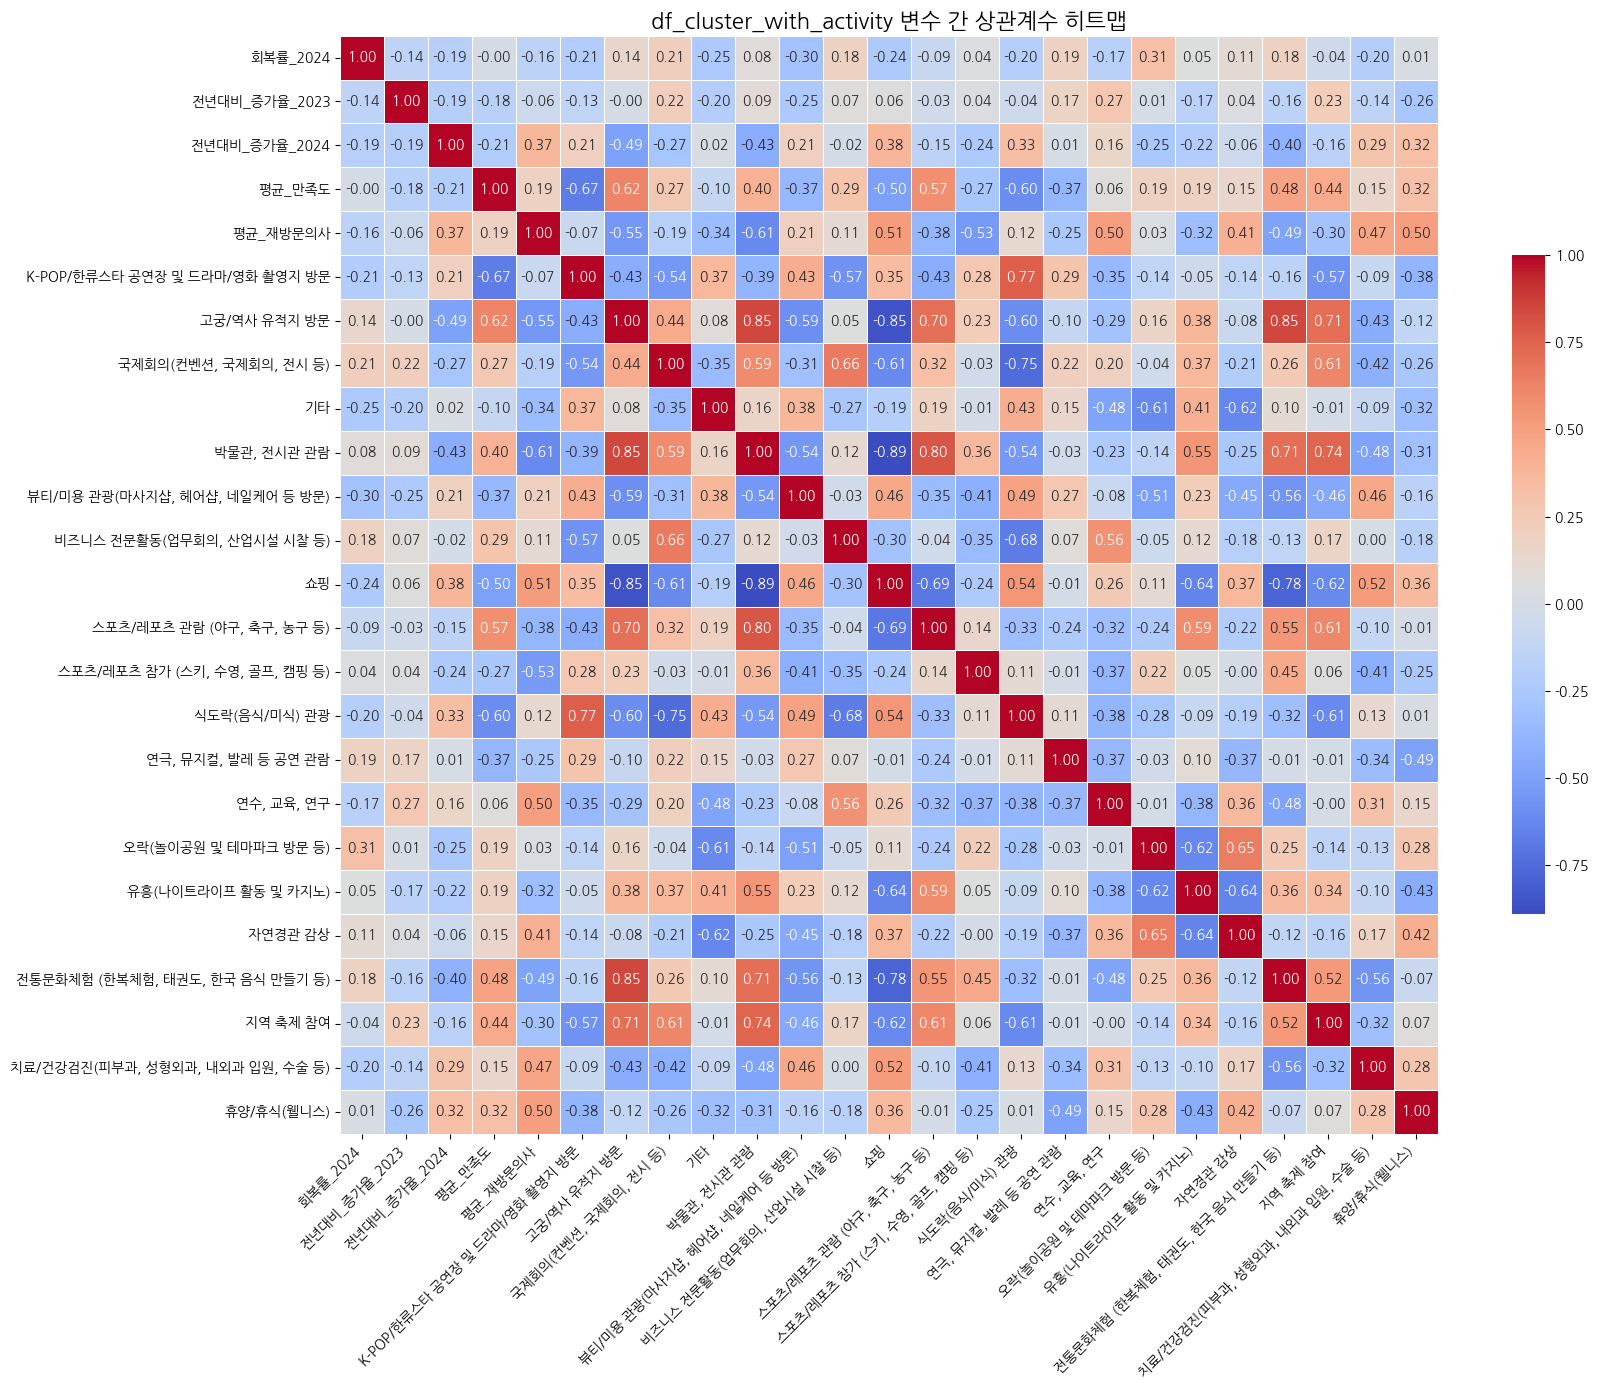

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 상관계수 계산
corr = df_cluster_with_activity.corr(numeric_only=True)

# 2. 히트맵 시각화
plt.figure(figsize=(18, 14))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            cbar_kws={"shrink": .6},
            linewidths=0.5)

plt.title("df_cluster_with_activity 변수 간 상관계수 히트맵", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## PCA 및 기여도(설명력)확인

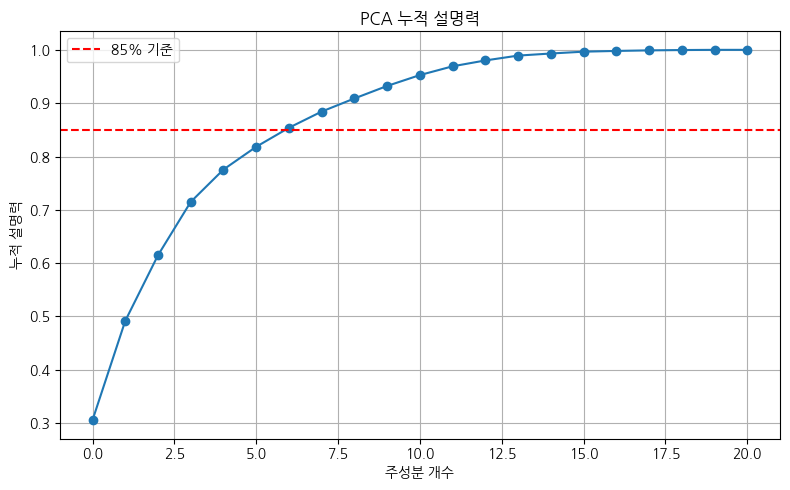

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. 사용할 변수 선택
features = df_cluster_with_activity.columns.tolist()  # 또는 수동으로 지정해도 됩니다

# 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_with_activity[features])

# 3. PCA 적용 (설명력 확인을 위해 n_components=None)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. 주성분별 설명 분산 비율
explained_var = pca.explained_variance_ratio_

# 5. 누적 설명력 그래프
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명력')
plt.title('PCA 누적 설명력')
plt.grid(True)
plt.axhline(y=0.85, color='r', linestyle='--', label='85% 기준')
plt.legend()
plt.tight_layout()
plt.show()

- PCA의 PC1, PC2에 가장 많이 기여한 변수를 확인

In [71]:
# PCA 구성 요소 로딩값 계산
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=features)

# PC1과 PC2의 주요 기여 변수(절댓값 기준 상위 5개) 출력
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(5)
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(5)

print("🔹 PC1 주요 기여 변수:")
print(loadings.loc[top_features_pc1.index, 'PC1'])

print("\n🔹 PC2 주요 기여 변수:")
print(loadings.loc[top_features_pc2.index, 'PC2'])

🔹 PC1 주요 기여 변수:
박물관, 전시관 관람                        0.341679
쇼핑                                -0.339014
고궁/역사 유적지 방문                       0.334374
전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)    0.287953
지역 축제 참여                           0.277560
Name: PC1, dtype: float64

🔹 PC2 주요 기여 변수:
기타                                0.355242
자연경관 감상                          -0.321457
연수, 교육, 연구                       -0.319223
K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문    0.313989
식도락(음식/미식) 관광                     0.277552
Name: PC2, dtype: float64


- 시각화

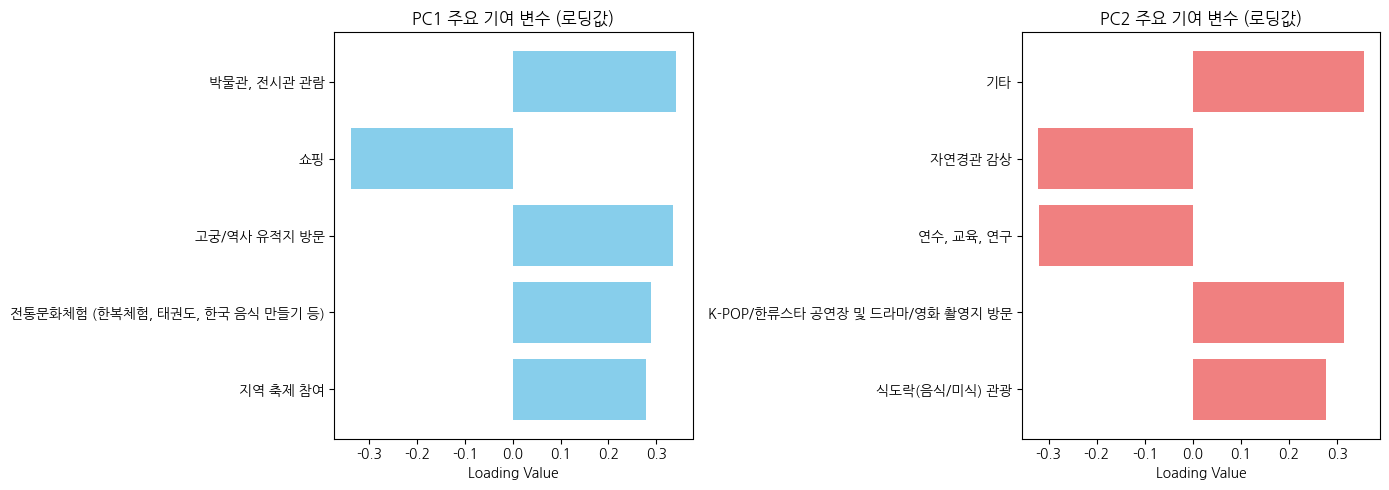

In [72]:
import matplotlib.pyplot as plt

# 로딩값 기준 상위 5개 변수 추출 (절댓값 기준)
top5_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(5).index
top5_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(5).index

# 실제 값 가져오기 (부호 포함)
pc1_values = loadings.loc[top5_pc1, 'PC1']
pc2_values = loadings.loc[top5_pc2, 'PC2']

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PC1
axes[0].barh(pc1_values.index, pc1_values.values, color='skyblue')
axes[0].set_title('PC1 주요 기여 변수 (로딩값)')
axes[0].set_xlabel('Loading Value')
axes[0].invert_yaxis()

# PC2
axes[1].barh(pc2_values.index, pc2_values.values, color='lightcoral')
axes[1].set_title('PC2 주요 기여 변수 (로딩값)')
axes[1].set_xlabel('Loading Value')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## 클러스터링

In [75]:
df_cluster_with_activity.head()

,회복률_2024,전년대비_증가율_2023,전년대비_증가율_2024,평균_만족도,평균_재방문의사,K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문,고궁/역사 유적지 방문,"국제회의(컨벤션, 국제회의, 전시 등)",기타,"박물관, 전시관 관람",...,"연극, 뮤지컬, 발레 등 공연 관람","연수, 교육, 연구",오락(놀이공원 및 테마파크 방문 등),유흥(나이트라이프 활동 및 카지노),자연경관 감상,"전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",지역 축제 참여,"치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",휴양/휴식(웰니스),cluster
기타,1.459135,-0.780284,-0.109971,4.692366,4.432265,0.065898,0.517298,0.024712,0.008237,0.220758,...,0.018122,0.018122,0.112026,0.090610,0.365733,0.243822,0.024712,0.009885,0.067545,0
대만,0.682488,0.122898,-0.039171,4.502048,4.531779,0.110312,0.158273,0.019185,0.008393,0.091127,...,0.020384,0.009592,0.099520,0.056355,0.354916,0.087530,0.007194,0.028777,0.081535,1
독일,1.708223,-0.439423,0.104631,4.660891,4.487144,0.035714,0.385093,0.040373,0.000000,0.111801,...,0.024845,0.041925,0.108696,0.069876,0.357143,0.099379,0.027950,0.085404,0.094720,2
러시아,0.937063,2.000000,-0.001862,4.746571,4.585704,0.055970,0.464552,0.024254,0.014925,0.177239,...,0.022388,0.014925,0.067164,0.095149,0.311567,0.192164,0.054104,0.050373,0.097015,0
말레이시아,1.108069,0.135076,0.476008,4.624859,4.640048,0.040312,0.269181,0.022107,0.002601,0.079324,...,0.019506,0.037711,0.091027,0.036411,0.399220,0.118336,0.040312,0.019506,0.260078,2


## 최적의 K(클러스터 수) 찾기

### 엘보우 기법

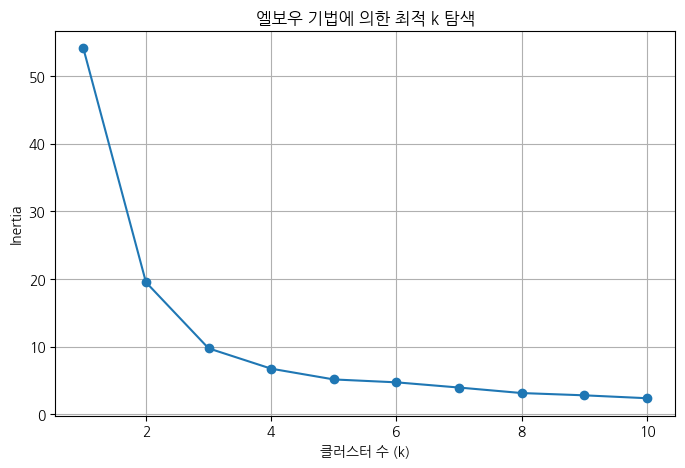

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터링 대상 변수
X = df_cluster_with_activity.drop(columns=['cluster'])

# 클러스터 수 범위
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('엘보우 기법에 의한 최적 k 탐색')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### 실루엣 점수

클러스터 수: 2, 실루엣 점수: 0.5526
클러스터 수: 3, 실루엣 점수: 0.4761
클러스터 수: 4, 실루엣 점수: 0.3481
클러스터 수: 5, 실루엣 점수: 0.3373
클러스터 수: 6, 실루엣 점수: 0.2751
클러스터 수: 7, 실루엣 점수: 0.2331
클러스터 수: 8, 실루엣 점수: 0.3012
클러스터 수: 9, 실루엣 점수: 0.2609


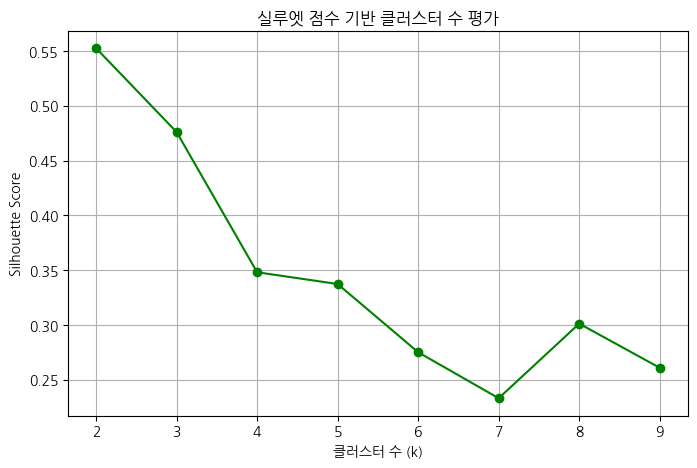

In [87]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'클러스터 수: {k}, 실루엣 점수: {score:.4f}')

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', color='green')
plt.title('실루엣 점수 기반 클러스터 수 평가')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## k=2 클러스터링

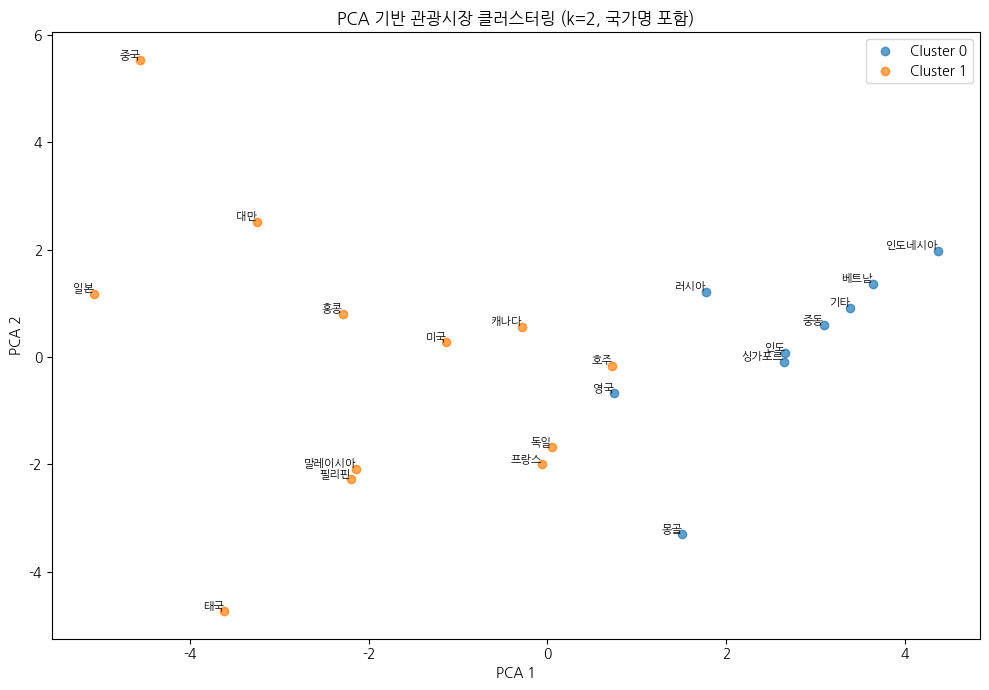

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 사용할 변수 선택
features = df_cluster_with_activity.columns.difference(['cluster'])  # 혹시 이전 클러스터 제거
X = df_cluster_with_activity[features]

# 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 클러스터링 (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster_with_activity['cluster'] = kmeans.fit_predict(X_scaled)

# 4. PCA 차원 축소 (시각화를 위한)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. PCA 시각화
plt.figure(figsize=(10, 7))
for label in sorted(df_cluster_with_activity['cluster'].unique()):
    cluster_indices = df_cluster_with_activity[df_cluster_with_activity['cluster'] == label].index
    cluster_pos = df_cluster_with_activity.index.get_indexer(cluster_indices)
    plt.scatter(X_pca[cluster_pos, 0],
                X_pca[cluster_pos, 1],
                label=f'Cluster {label}', alpha=0.7)

# 국가명 표시
for i, country in enumerate(df_cluster_with_activity.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(country), fontsize=8, ha='right', va='bottom')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 기반 관광시장 클러스터링 (k=2, 국가명 포함)')
plt.legend()
plt.tight_layout()
plt.show()


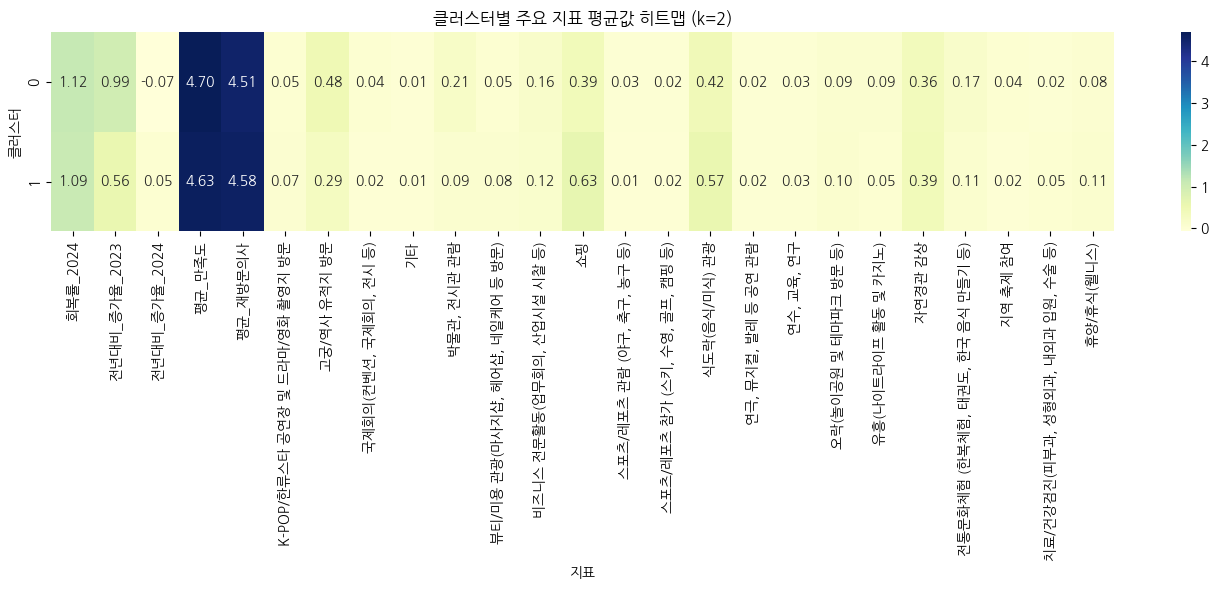

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# 클러스터별 평균값 계산
cluster_means = df_cluster_with_activity.groupby('cluster').mean(numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('클러스터별 주요 지표 평균값 히트맵 (k=2)')
plt.xlabel('지표')
plt.ylabel('클러스터')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **K=2 기준 클러스터링 인사이트 정리**

#### Cluster 0: 회복도 높고 충성도 높은 균형형 시장  
- **주요 국가**: 인도네시아, 베트남, 중동, 기타, 인도, 싱가포르, 러시아, 몽골, 영국  
- **회복 지표**: 회복률(1.12), 전년대비 증가율(0.99) 등 회복 흐름이 뚜렷함  
- **충성도 지표**: 평균 만족도(4.70), 재방문의사(4.51)로 매우 긍정적  
- **주요 활동**:  
  - 전통문화체험, 고궁/역사유적, 자연경관 감상, 식도락 등 다채로운 참여  
- **전략 방향**:  
  - 재방문 전환 가능성 높은 시장으로 장기 로열티 기반 마케팅  
  - 한국 문화 경험 중심 복합형 콘텐츠 확대

---

#### Cluster 1: 회복 부진한 한류·쇼핑 중심 시장  
- **주요 국가**: 일본, 홍콩, 대만, 중국, 미국, 캐나다, 호주, 프랑스, 독일, 말레이시아, 필리핀, 태국  
- **회복 지표**: 회복률(1.09), 전년대비 증가율(0.56)로 정체 또는 부진  
- **충성도 지표**: 만족도(4.63), 재방문의사(4.58)로 여전히 높은 수준  
- **주요 활동**:  
  - 쇼핑(0.63), 식도락(0.57), 뷰티/한류 콘텐츠에 집중  
- **전략 방향**:  
  - 상업 콘텐츠 리뉴얼 (쇼핑·미식·뷰티 집중 국가)  
  - 한국 내 소비 연계 인센티브 제공 + 재유치형 마케팅 필요

---

#### 종합 비교 요약

| 항목           | Cluster 0                      | Cluster 1                     |
|----------------|--------------------------------|--------------------------------|
| 회복 속도      | 빠름                           | 정체 또는 부진                 |
| 만족도/재방문  | 높음                           | 보통 이상                      |
| 활동 유형      | 전통+자연+문화 복합형           | 쇼핑+식도락+한류 상업형        |
| 전략 방향      | 재방문 기반 마케팅 + 전통문화 확대 | 소비형 한류 리뉴얼 및 인센티브 전략 |


## k=3  클러스터링

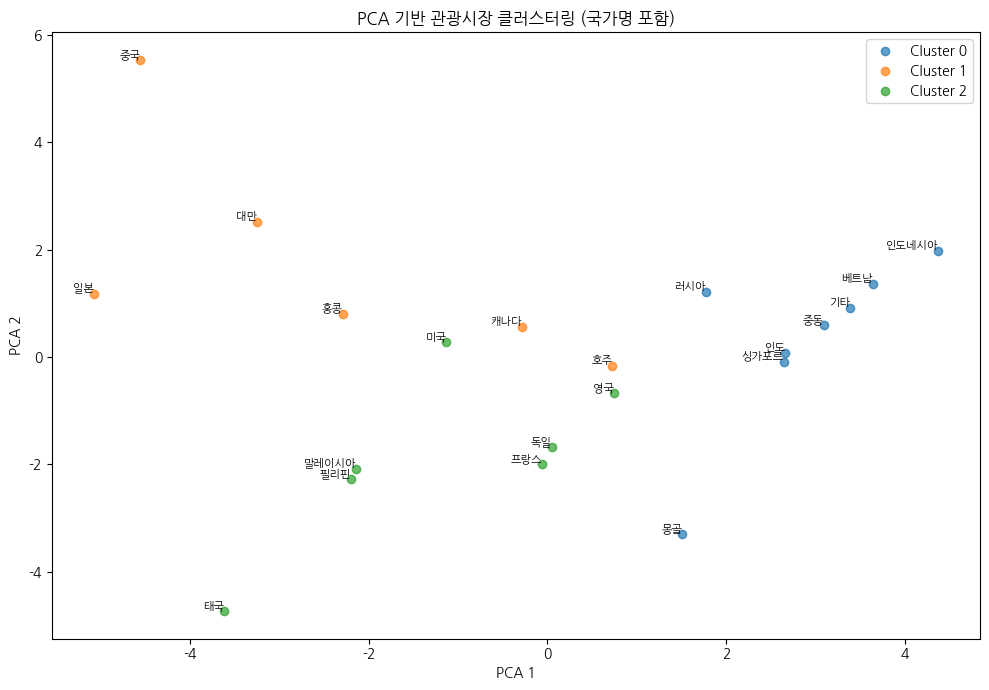

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_with_activity['cluster'] = kmeans.fit_predict(X_pca)

# 2. 시각화
plt.figure(figsize=(10, 7))

# 각 클러스터별 점 찍기
for label in sorted(df_cluster_with_activity['cluster'].unique()):
    cluster_indices = df_cluster_with_activity[df_cluster_with_activity['cluster'] == label].index
    cluster_pos = df_cluster_with_activity.index.get_indexer(cluster_indices)

    plt.scatter(X_pca[cluster_pos, 0],
                X_pca[cluster_pos, 1],
                label=f'Cluster {label}', alpha=0.7)

# 국가명 라벨 출력
for i, country in enumerate(df_cluster_with_activity.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(country), fontsize=8, ha='right', va='bottom')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 기반 관광시장 클러스터링 (국가명 포함)')
plt.legend()
plt.tight_layout()
plt.show()

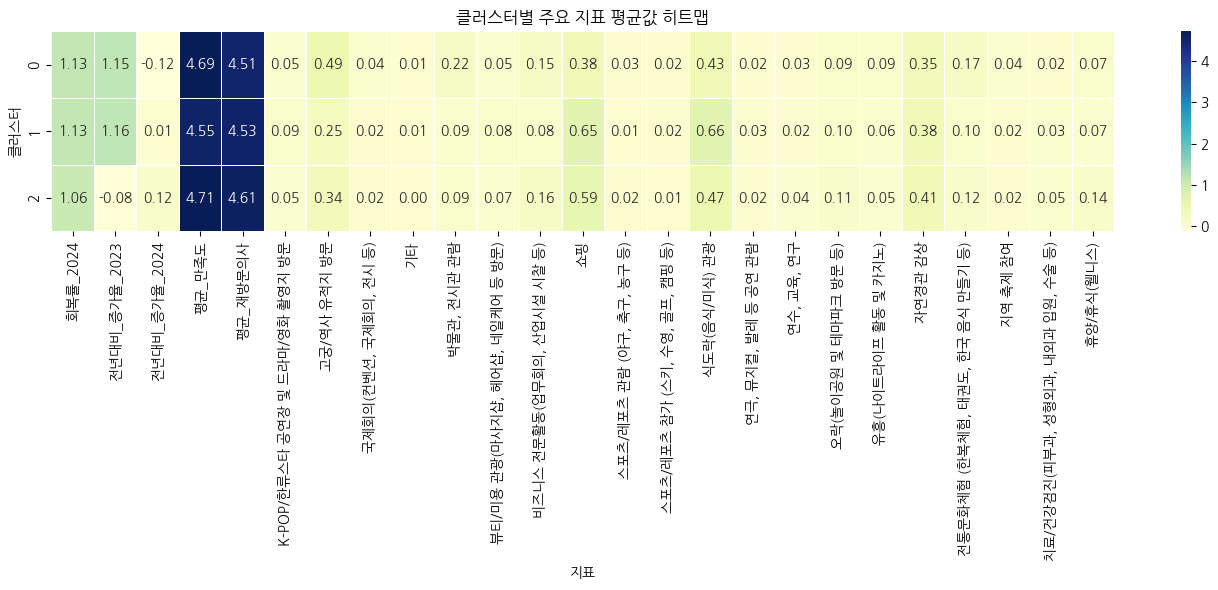

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 클러스터별 변수 평균값 계산
cluster_means = df_cluster_with_activity.groupby('cluster').mean(numeric_only=True)

# 2. 히트맵 시각화
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title('클러스터별 주요 지표 평균값 히트맵')
plt.xlabel('지표')
plt.ylabel('클러스터')
plt.tight_layout()
plt.show()

### **K=3 기준 클러스터링 인사이트 정리**

#### Cluster 0: 빠른 회복과 높은 충성도를 보이는 시장  
- **주요 국가**: 인도네시아, 베트남, 중동, 기타, 인도, 싱가포르, 러시아  
- **회복 지표**: 회복률 및 전년대비 증가율이 전반적으로 높음  
- **충성도 지표**: 평균 만족도(4.69), 재방문의사(4.51) 높음  
- **주요 활동**: 전통문화체험, 자연경관 감상, 식도락, 고궁/역사유적 방문 등 다양한 활동 참여  
- **전략 방향**:  
  - 전통문화 + 자연 기반 프리미엄 콘텐츠 강화  
  - 고부가가치 패키지 개발 및 복합 테마 구성

---

#### Cluster 1: 상업적 목적이 강한 활동 중심 시장  
- **주요 국가**: 일본, 홍콩, 대만, 중국, 미국, 캐나다, 호주  
- **회복 지표**: 회복률 낮거나 정체, 전년대비 회복세 미약  
- **충성도 지표**: 평균 만족도(4.55), 재방문의사(4.53) 보통 이상  
- **주요 활동**: 쇼핑(0.65), 식도락(0.66), 뷰티 등 한류 상업 콘텐츠 집중  
- **전략 방향**:  
  - 쇼핑/미식/뷰티 특화 테마상품 리뉴얼  
  - 리마인드 콘텐츠 강화 및 브랜드 중심 마케팅 강화

---

#### Cluster 2: 전통 중심 특화 시장  
- **주요 국가**: 필리핀, 태국, 말레이시아, 프랑스, 독일, 영국  
- **회복 지표**: 2023년 정체 또는 감소 → 2024년 회복세  
- **충성도 지표**: 만족도(4.71), 재방문의사(4.61) 가장 높음  
- **주요 활동**: 전통문화체험, 고궁/역사유적, 지역축제, 자연경관 등 높은 비중  
- **전략 방향**:  
  - 전통문화 + 역사 콘텐츠 중심  
  - 지역 연계형 축제·스토리텔링 강화

---

#### 종합 비교 요약

| 항목           | Cluster 0                 | Cluster 1                  | Cluster 2                  |
|----------------|---------------------------|----------------------------|----------------------------|
| 회복 속도      | 빠름                      | 느림                       | 점진적 회복                |
| 만족도/재방문  | 높음                      | 보통~높음                  | 매우 높음                  |
| 활동 유형      | 전통+자연+문화 (복합형)   | 쇼핑+한류+뷰티 (상업형)    | 전통+자연 중심 (선호형)    |
| 전략 방향      | 프리미엄 콘텐츠 확장       | 테마 특화 및 리마인드 강화 | 전통문화 기반 차별화 전략  |


# 깔끔하게 클러스터링 되지 못함

## 최적 K (클러스터 수) 찾기

### 1. 엘보우 기법 (Elbow Method)

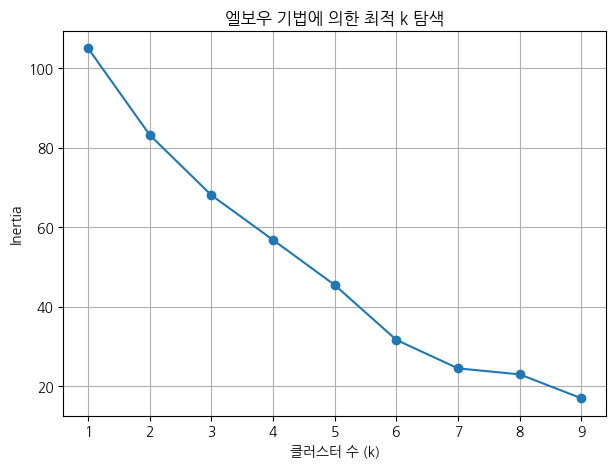

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # 표준화된 변수
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Inertia')
plt.title('엘보우 기법에 의한 최적 k 탐색')
plt.xticks(K_range)
plt.grid(True)
plt.show()

### 2. 실루엣 점수 (Silhouette Score)

In [83]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"클러스터 수: {k}, 실루엣 점수: {score:.4f}")

클러스터 수: 2, 실루엣 점수: 0.1598
클러스터 수: 3, 실루엣 점수: 0.1576
클러스터 수: 4, 실루엣 점수: 0.1694
클러스터 수: 5, 실루엣 점수: 0.2224
클러스터 수: 6, 실루엣 점수: 0.2527
클러스터 수: 7, 실루엣 점수: 0.2861
클러스터 수: 8, 실루엣 점수: 0.2819
클러스터 수: 9, 실루엣 점수: 0.3133


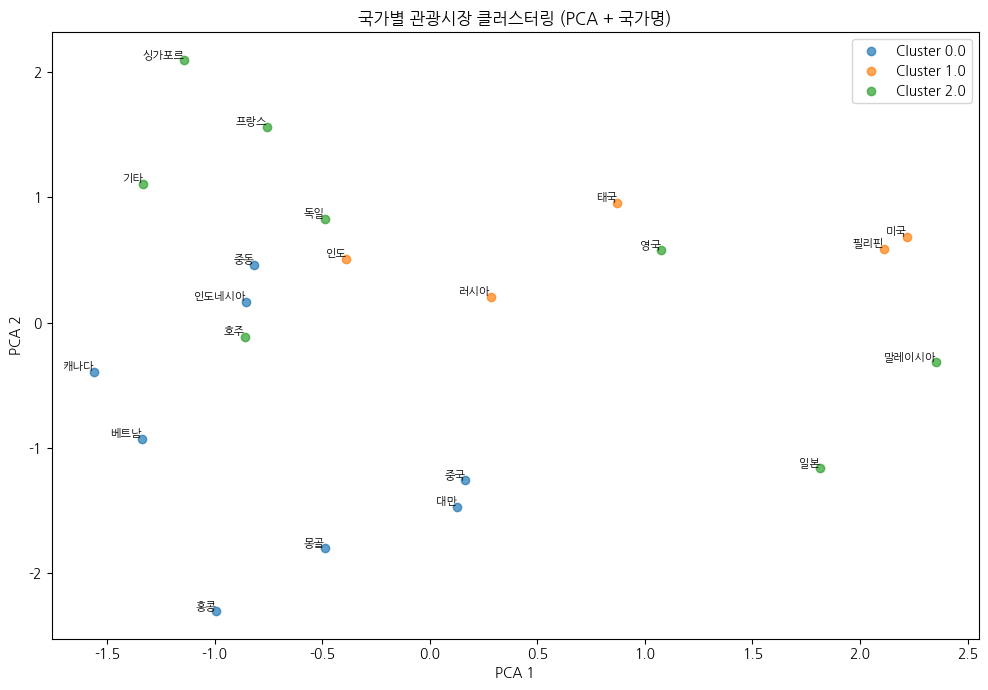

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 클러스터링 대상 변수 선택
features = ['회복률_2024', '전년대비_증가율_2023', '전년대비_증가율_2024', '평균_만족도', '평균_재방문의사']
X = df_cluster[features].dropna()  # 혹시 모를 NaN 제거

# 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans 클러스터링 (클러스터 수는 3개 예시)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster.loc[X.index, 'cluster'] = kmeans.fit_predict(X_scaled)

# 4. PCA 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. 시각화
plt.figure(figsize=(10, 7))

# 클러스터별 점 찍기
for label in sorted(df_cluster['cluster'].unique()):
    cluster_idx = df_cluster[df_cluster['cluster'] == label].index
    idx_in_X = [i for i, idx in enumerate(X.index) if idx in cluster_idx]
    plt.scatter(X_pca[idx_in_X, 0], X_pca[idx_in_X, 1], label=f'Cluster {label}', alpha=0.7)

# 국가명 텍스트로 출력
for i, idx in enumerate(X.index):
    plt.text(X_pca[i, 0], X_pca[i, 1], str(idx), fontsize=8, ha='right', va='bottom')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('국가별 관광시장 클러스터링 (PCA + 국가명)')
plt.legend()
plt.tight_layout()
plt.show()


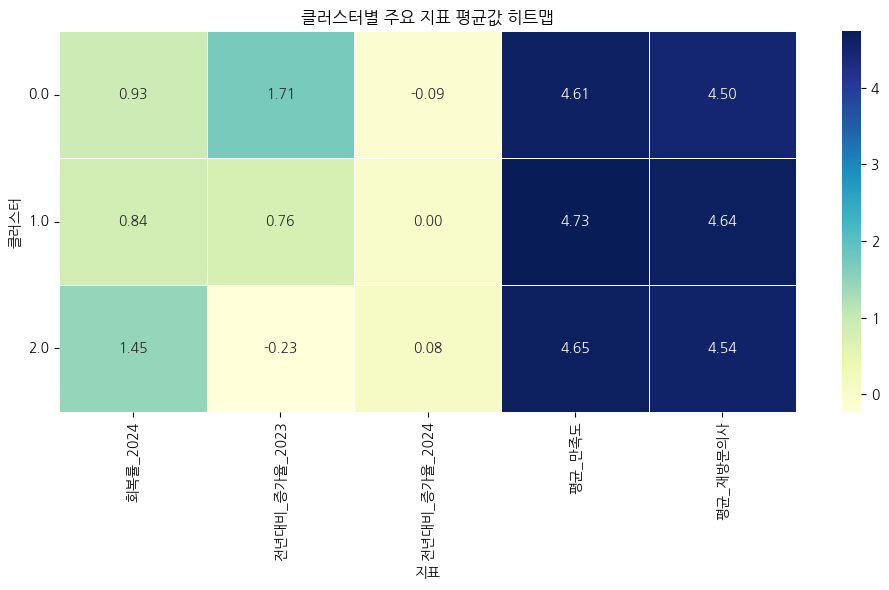

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵에 넣을 컬럼 목록 (앞서 사용한 클러스터링 변수들)
features = ['회복률_2024', '전년대비_증가율_2023', '전년대비_증가율_2024', '평균_만족도', '평균_재방문의사']

# 클러스터별 평균값 계산
cluster_means = df_cluster.groupby('cluster')[features].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("클러스터별 주요 지표 평균값 히트맵")
plt.xlabel("지표")
plt.ylabel("클러스터")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()